In [ ]:

import kagglehub
aaryapatel98_indian_diabetic_retinopathy_image_dataset_path = kagglehub.dataset_download('aaryapatel98/indian-diabetic-retinopathy-image-dataset')

print('Data source import complete.')


In [ ]:


import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/indian-diabetic-retinopathy-image-dataset/A.%20Segmentation/A. Segmentation/LICENSE.txt
/kaggle/input/indian-diabetic-retinopathy-image-dataset/A.%20Segmentation/A. Segmentation/CC-BY-4.0.txt
/kaggle/input/indian-diabetic-retinopathy-image-dataset/A.%20Segmentation/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/3. Hard Exudates/IDRiD_30_EX.tif
/kaggle/input/indian-diabetic-retinopathy-image-dataset/A.%20Segmentation/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/3. Hard Exudates/IDRiD_17_EX.tif
/kaggle/input/indian-diabetic-retinopathy-image-dataset/A.%20Segmentation/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/3. Hard Exudates/IDRiD_44_EX.tif
/kaggle/input/indian-diabetic-retinopathy-image-dataset/A.%20Segmentation/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/3. Hard Exudates/IDRiD_31_EX.tif
/kaggle/input/indian-diabetic-retinopathy-image-dataset/A.%20Segmentation/A. Segmentation/2. All Segmentat

In [ ]:
!pip install segmentation_models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import glob
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [ ]:
import glob
import cv2
import os
images_t = glob.glob("/kaggle/input/indian-diabetic-retinopathy-image-dataset/A.%20Segmentation/A. Segmentation/1. Original Images/a. Training Set/*.jpg")
images_t.sort()
images_v = glob.glob("/kaggle/input/indian-diabetic-retinopathy-image-dataset/A.%20Segmentation/A. Segmentation/1. Original Images/b. Testing Set/*.jpg")
images_v.sort()
masks_t = glob.glob("/kaggle/input/indian-diabetic-retinopathy-image-dataset/A.%20Segmentation/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/5. Optic Disc/*.tif")
masks_t.sort()
masks_v = glob.glob("/kaggle/input/indian-diabetic-retinopathy-image-dataset/A.%20Segmentation/A. Segmentation/2. All Segmentation Groundtruths/b. Testing Set/5. Optic Disc/*.tif")
masks_v.sort()
print(len(images_t))
print(len(images_v))
print(len(masks_t))
print(len(masks_v))

54
27
54
27


In [ ]:
for x in images_t:
    print(x)

/kaggle/input/indian-diabetic-retinopathy-image-dataset/A.%20Segmentation/A. Segmentation/1. Original Images/a. Training Set/IDRiD_01.jpg
/kaggle/input/indian-diabetic-retinopathy-image-dataset/A.%20Segmentation/A. Segmentation/1. Original Images/a. Training Set/IDRiD_02.jpg
/kaggle/input/indian-diabetic-retinopathy-image-dataset/A.%20Segmentation/A. Segmentation/1. Original Images/a. Training Set/IDRiD_03.jpg
/kaggle/input/indian-diabetic-retinopathy-image-dataset/A.%20Segmentation/A. Segmentation/1. Original Images/a. Training Set/IDRiD_04.jpg
/kaggle/input/indian-diabetic-retinopathy-image-dataset/A.%20Segmentation/A. Segmentation/1. Original Images/a. Training Set/IDRiD_05.jpg
/kaggle/input/indian-diabetic-retinopathy-image-dataset/A.%20Segmentation/A. Segmentation/1. Original Images/a. Training Set/IDRiD_06.jpg
/kaggle/input/indian-diabetic-retinopathy-image-dataset/A.%20Segmentation/A. Segmentation/1. Original Images/a. Training Set/IDRiD_07.jpg
/kaggle/input/indian-diabetic-reti

In [ ]:
for x in masks_t:
    print(x)

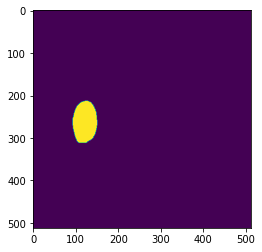

In [ ]:
import os
image_t=[]
image_v=[]
mask_t=[]
mask_v=[]
for x in images_t:
  im=cv2.imread(x,cv2.IMREAD_COLOR)
  im=cv2.resize(im,(512,512))
  image_t.append(im)
for x in images_v:
  im=cv2.imread(x,cv2.IMREAD_COLOR)
  im=cv2.resize(im,(512,512))
  image_v.append(im)
for y in masks_t:
  ma=cv2.imread(y,cv2.IMREAD_GRAYSCALE)
  ma=cv2.resize(ma,(512,512),interpolation = cv2.INTER_NEAREST)
  plt.imshow(ma)
  mask_t.append(ma)
for y in masks_v:
  ma=cv2.imread(y,cv2.IMREAD_GRAYSCALE)
  ma=cv2.resize(ma,(512,512),interpolation = cv2.INTER_NEAREST)
  plt.imshow(ma)
  mask_v.append(ma)

#model comparitive studies - when minimizing or reducing the dataset size by even half

In [ ]:
print(len(image_t),len(mask_t))
img_array_t=np.array(image_t)
mask_array_t=np.array(mask_t)
mask_array_t=np.expand_dims(mask_array_t,axis=-1)
img_array_v=np.array(image_v)
mask_array_v=np.array(mask_v)
mask_array_v=np.expand_dims(mask_array_v,axis=-1)
mask_array_t=mask_array_t.astype(np.float32)
mask_array_v=mask_array_v.astype(np.float32)
print(img_array_t.shape)
print(mask_array_t.shape)
print((np.unique(mask_array_t)))
print(mask_array_t.shape)

54 54
(54, 512, 512, 3)
(54, 512, 512, 1)
[ 0. 76.]
(54, 512, 512, 1)


In [ ]:
a=np.where(mask_array_t==76)
mask_array_t[a]=1
print(np.unique(mask_array_t))
b=np.where(mask_array_v==76)
mask_array_v[b]=1
print(np.unique(mask_array_v))

[0. 1.]
[0. 1.]


In [ ]:
plt.imshow(mask_array_t[20])

In [ ]:
import segmentation_models as sm
from segmentation_models import Linknet
from segmentation_models import get_preprocessing
from tensorflow.keras.utils import plot_model
sm.set_framework('tf.keras')
sm.framework()
BACKBONE = 'efficientnetb0'

preprocess_input = get_preprocessing(BACKBONE)
unet_odel = Unet(BACKBONE, input_shape=(512,512,3),encoder_weights='imagenet',activation='sigmoid')
#plot_model(model)

In [ ]:
import segmentation_models as sm
from segmentation_models import Linknet
from segmentation_models import get_preprocessing
from tensorflow.keras.utils import plot_model
sm.set_framework('tf.keras')
sm.framework()
BACKBONE = 'efficientnetb4'

preprocess_input = get_preprocessing(BACKBONE)
model = Linknet(BACKBONE, input_shape=(512,512,3),encoder_weights='imagenet',activation='sigmoid')
#plot_model(model)

71901184/71892840 [==============================] - 1s 0us/step


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics = ['binary_accuracy',tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.AUC(),sm.metrics.IOUScore(),sm.metrics.FScore()])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
mp=ModelCheckpoint('best_seg model.h5',save_best_only=True,monitor='val_iou_score')
lrp=ReduceLROnPlateau(monitor="iou_score", factor=0.1, patience=2)
es=EarlyStopping(patience=2,monitor='iou_score')
call=[lrp]
history=model.fit(img_array_t,
          mask_array_t,
          batch_size=1,
          epochs=70,
          validation_data=(img_array_v, mask_array_v),callbacks=call)

Epoch 1/70
54/54 [==============================] - 36s 242ms/step - loss: -22.1080 - binary_accuracy: 0.8353 - recall: 0.9718 - precision: 0.1069 - auc: 0.9790 - iou_score: 3.4054 - f1-score: 1.5085 - val_loss: -12468.4170 - val_binary_accuracy: 0.0000e+00 - val_recall: 1.0000 - val_precision: 0.0173 - val_auc: 0.5067 - val_iou_score: 1.3162 - val_f1-score: 1.1286
Epoch 2/70
54/54 [==============================] - 10s 190ms/step - loss: -74.2718 - binary_accuracy: 0.9668 - recall: 0.9995 - precision: 0.5434 - auc: 0.9971 - iou_score: 6.6335 - f1-score: 1.7246 - val_loss: -8407.6924 - val_binary_accuracy: 0.2323 - val_recall: 1.0000 - val_precision: 0.0226 - val_auc: 0.6656 - val_iou_score: 1.6110 - val_f1-score: 1.2255
Epoch 3/70
54/54 [==============================] - 10s 190ms/step - loss: -134.1844 - binary_accuracy: 0.9752 - recall: 0.9994 - precision: 0.7265 - auc: 0.9977 - iou_score: 11.0477 - f1-score: 1.8261 - val_loss: -2035.4696 - val_binary_accuracy: 0.3786 - val_recall: 

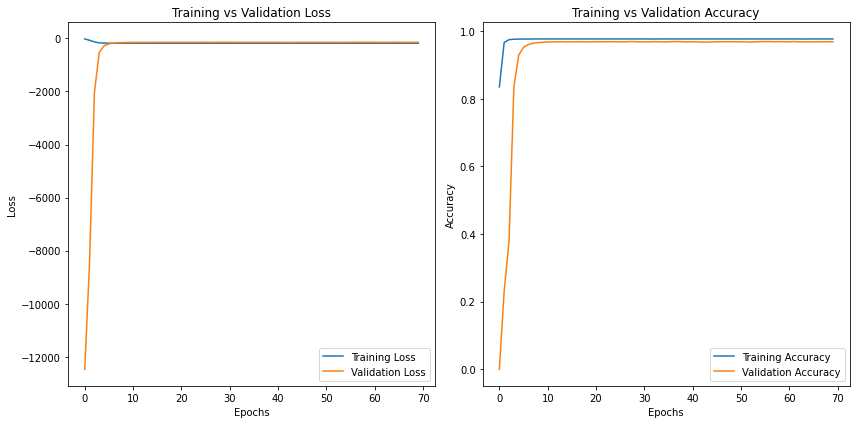

In [ ]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history.get('binary_accuracy', [])  # Some models might not track accuracy
val_accuracy = history.history.get('val_binary_accuracy', [])

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
if train_accuracy and val_accuracy:
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


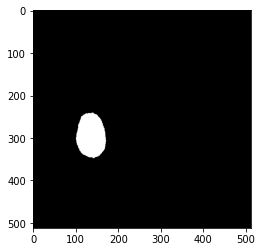

In [ ]:
test_preds = model.predict(img_array_v)
preds_test_thresh = (test_preds >= 0.5).astype(np.uint8)
test_img = preds_test_thresh[5, :, :, 0]
plt.imshow(test_img, cmap='gray')

In [ ]:
# After training is complete, save the model
model.save('/kaggle/working/linknet.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

def iou_score(y_true, y_pred, smooth=1e-6):
    """
    Computes Intersection over Union (IoU) metric.
    """
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1, 2, 3])
    union = K.sum(K.abs(y_true) + K.abs(y_pred), axis=[1, 2, 3]) - intersection
    return K.mean((intersection + smooth) / (union + smooth), axis=0)

import tensorflow as tf
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred):
    """
    Compute the F1 score, which is the harmonic mean of precision and recall.
    """
    epsilon = K.epsilon()
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

    precision = true_positives / (predicted_positives + epsilon)
    recall = true_positives / (possible_positives + epsilon)
    return 2 * (precision * recall) / (precision + recall + epsilon)


LinkNet Sample Outputs

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


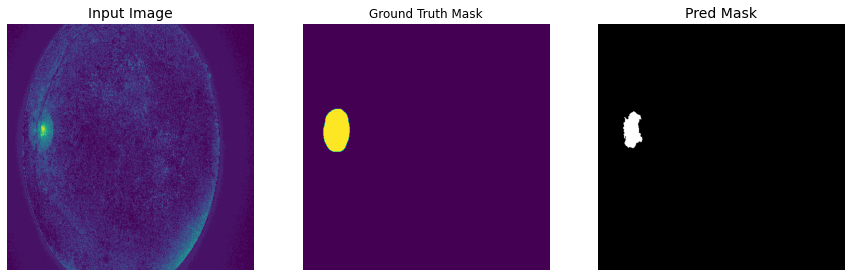

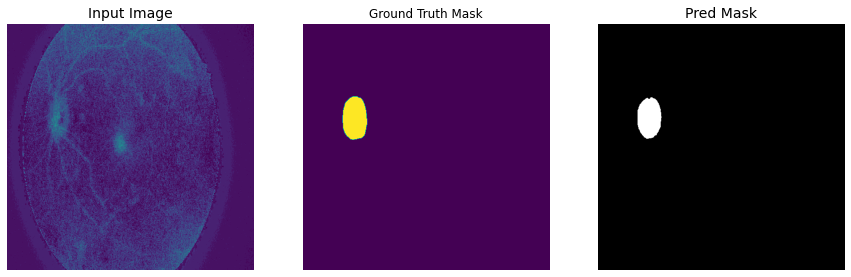

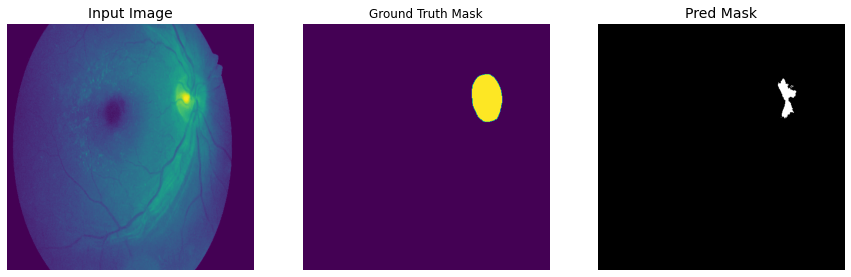

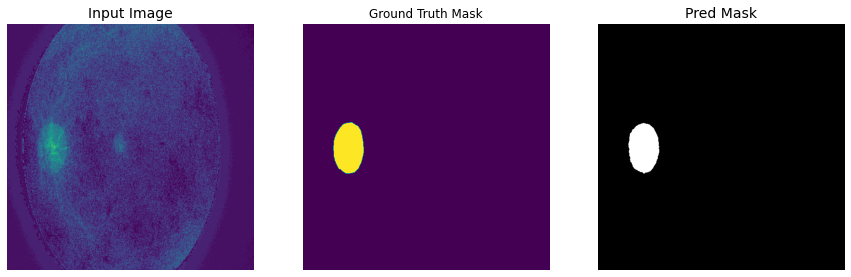

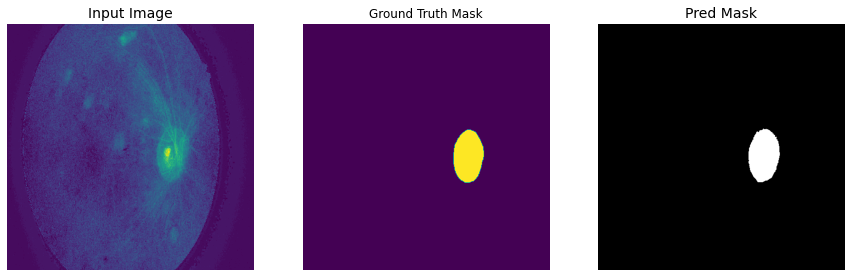

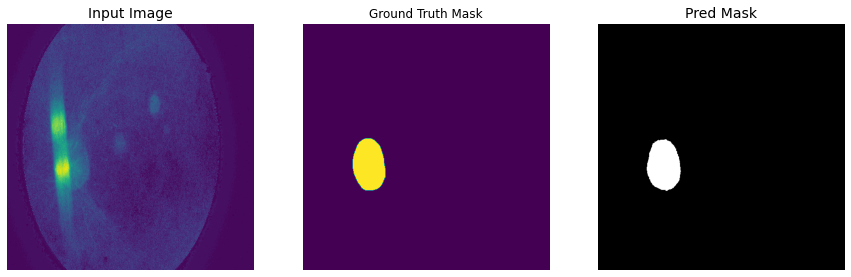

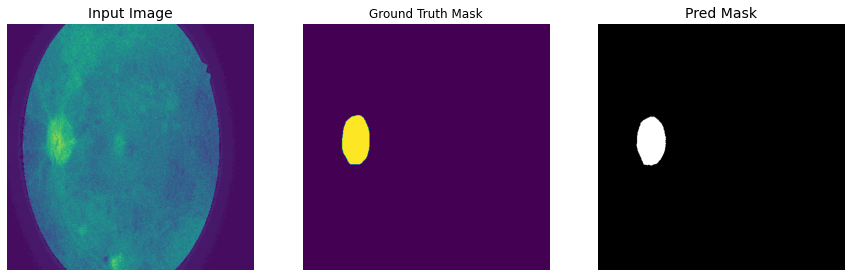

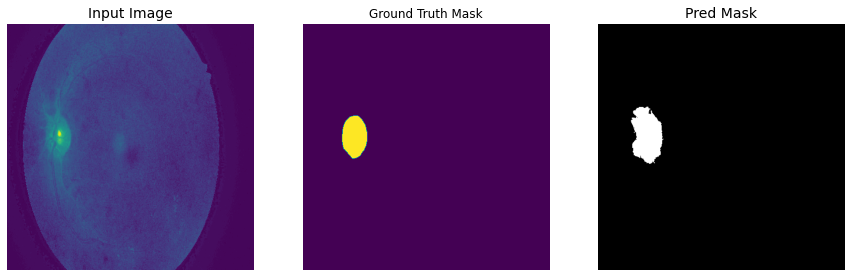

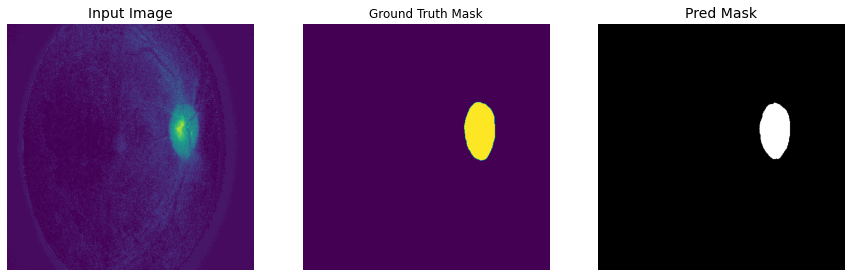

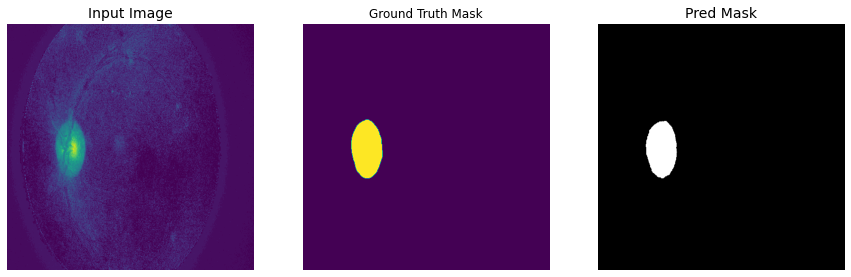

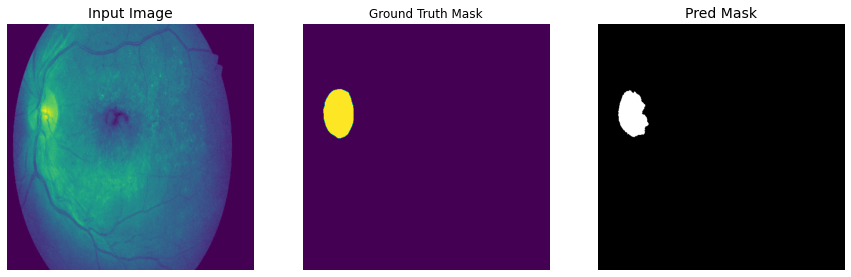

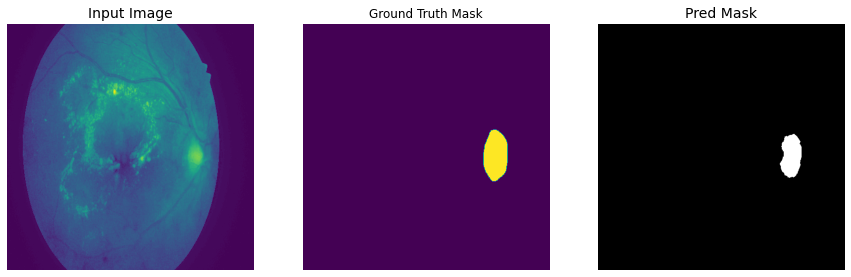

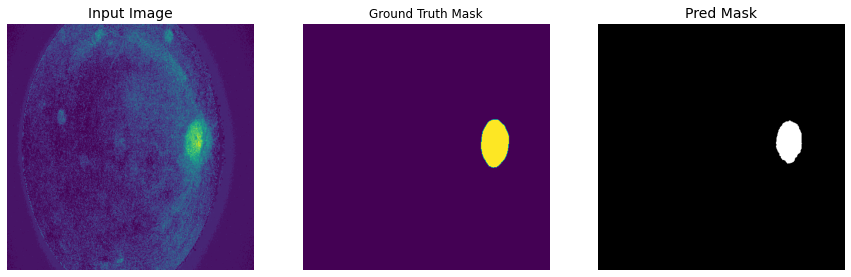

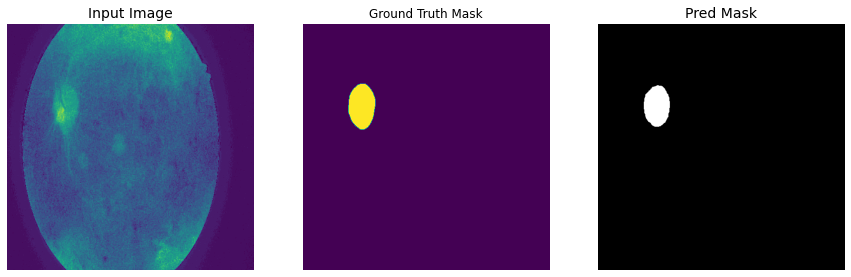

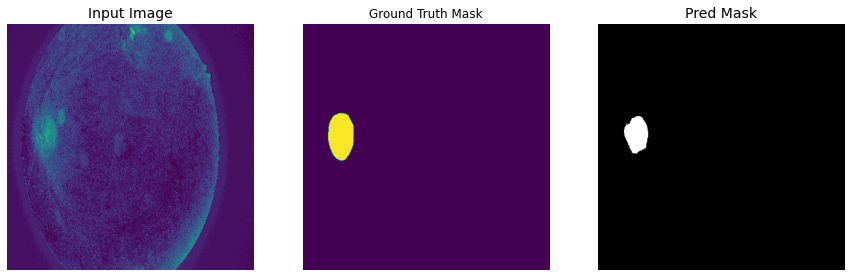

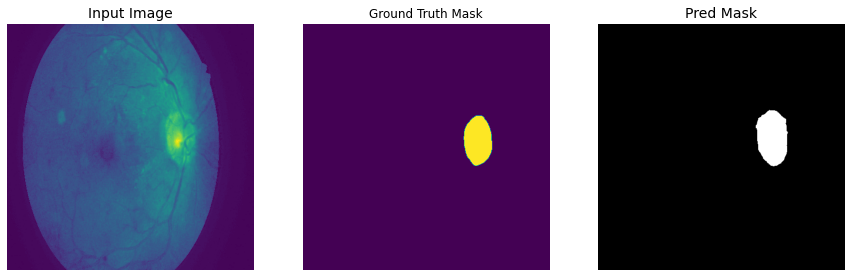

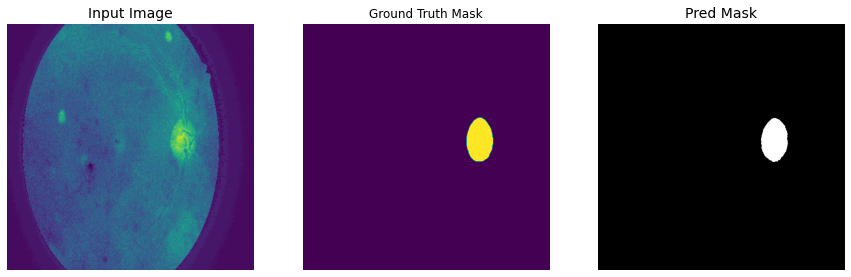

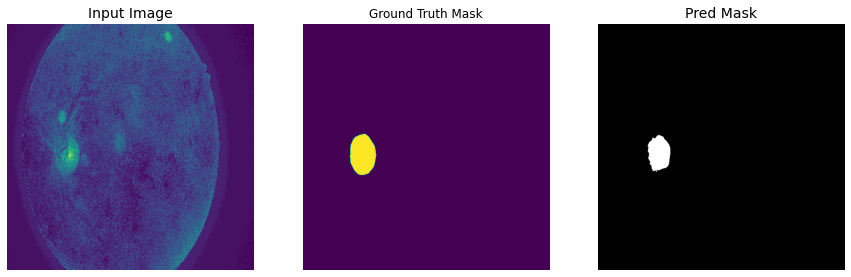

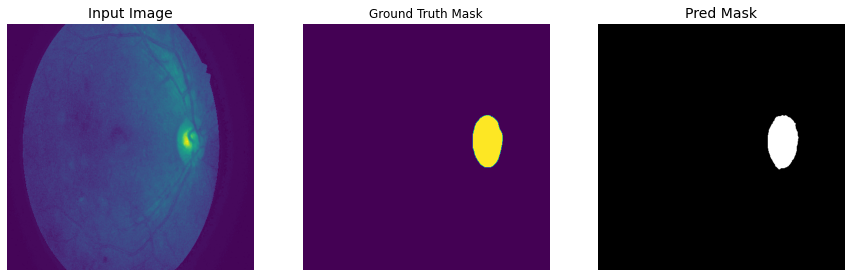

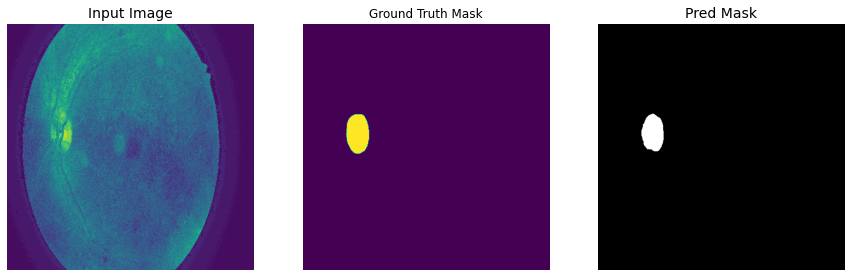

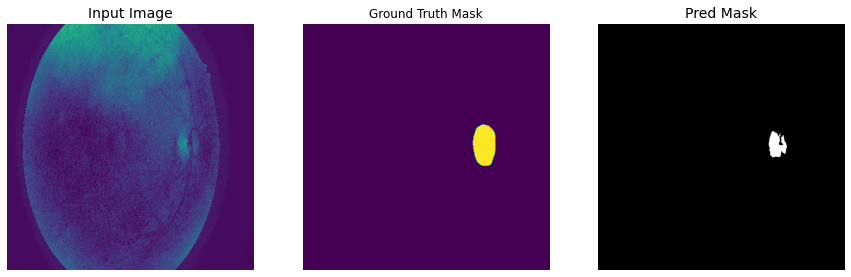

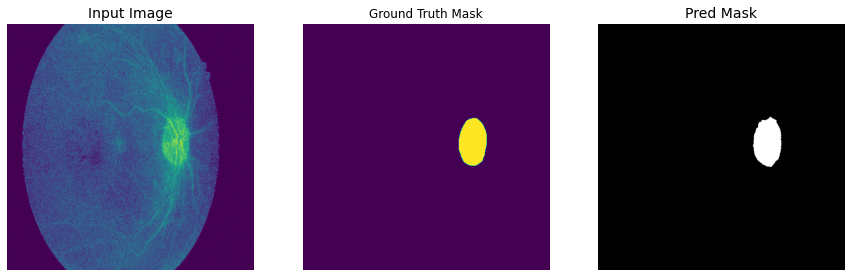

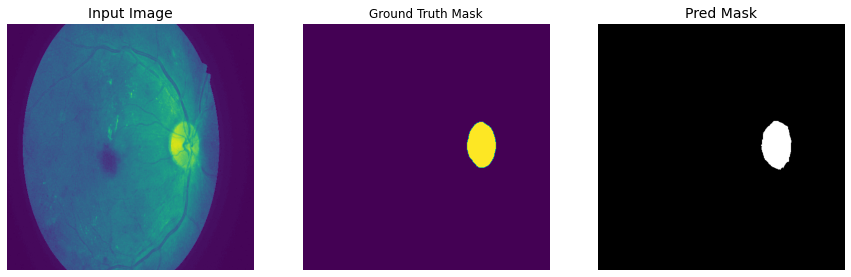

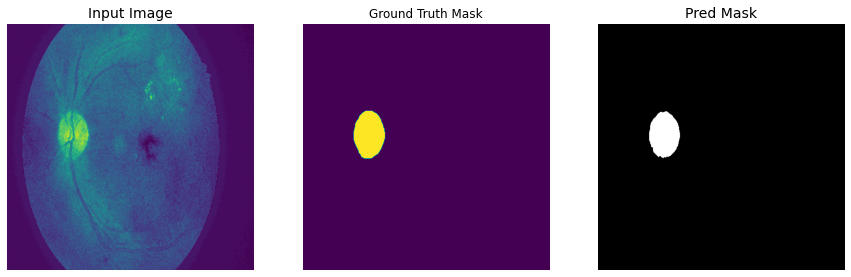

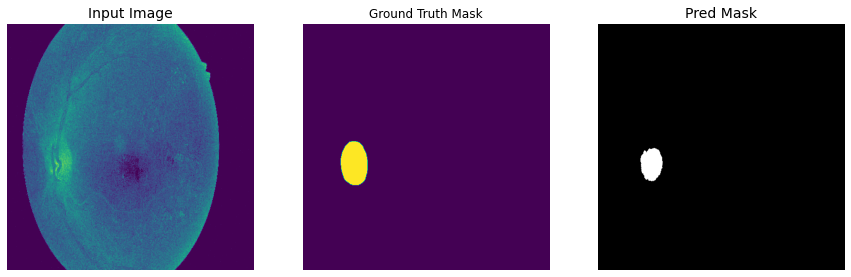

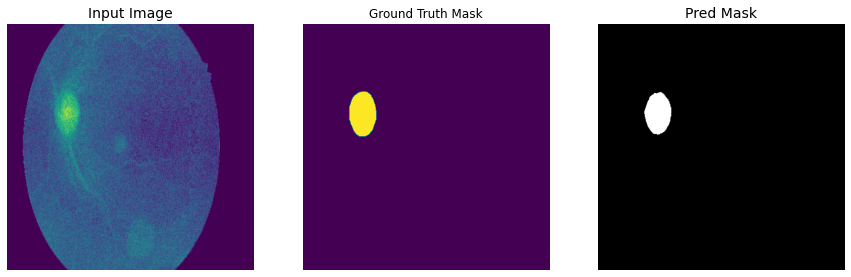

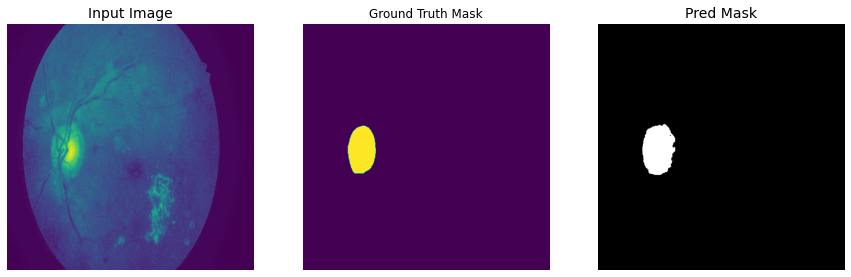

In [ ]:
for i in range(0,len(img_array_v)):
    plt.figure(figsize=(15,15))
    plt.axis('Off')
    test_image = img_array_v[i, :, :, 0]
    plt.subplot(1,3,1)
    plt.imshow(test_image)
    plt.title('Input Image', fontsize=14)
    plt.axis('off')

    test_mask=mask_array_v[i,:,:]
    plt.subplot(1,3,2)
    plt.imshow(test_mask)
    plt.title('Ground Truth Mask')
    plt.axis('off')

    test_mask = preds_test_thresh[i, :, :, 0]
    plt.subplot(1,3,3)
    plt.imshow(test_mask, cmap='gray')
    plt.title('Pred Mask', fontsize=14)
    plt.axis('off')

In [ ]:
from tensorflow.keras.models import load_model

unetm = load_model('/kaggle/working/trained_model.h5', custom_objects={'iou_score': iou_score, 'f1-score': f1_score})


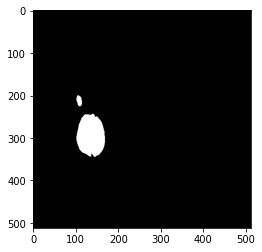

In [ ]:
test_preds = unetm.predict(img_array_v)
preds_test_thresh = (test_preds >= 0.5).astype(np.uint8)
test_img = preds_test_thresh[5, :, :, 0]
plt.imshow(test_img, cmap='gray')

Unet Sample Outputs

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


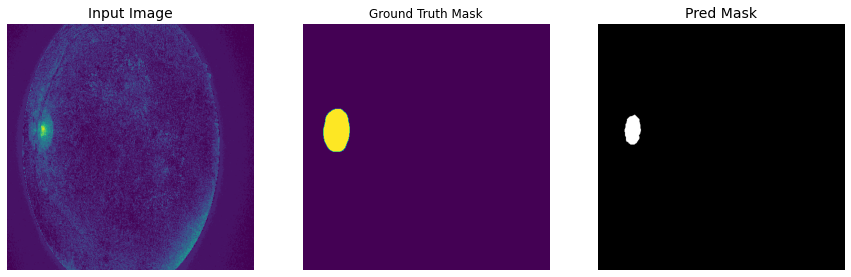

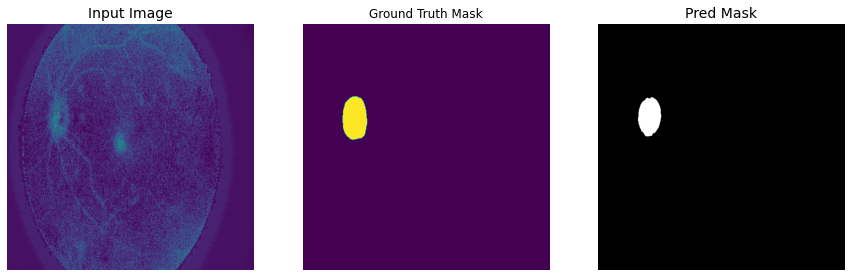

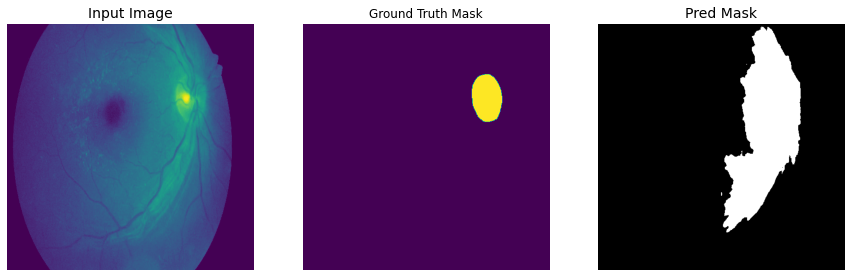

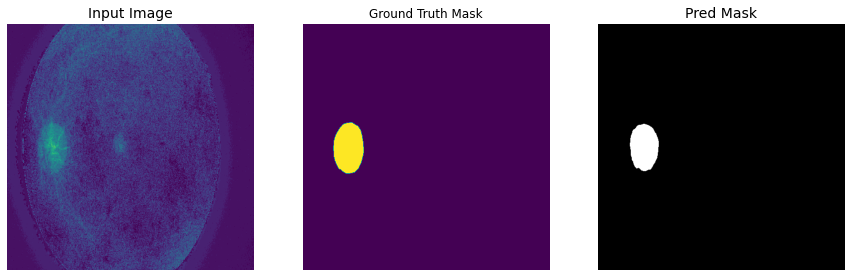

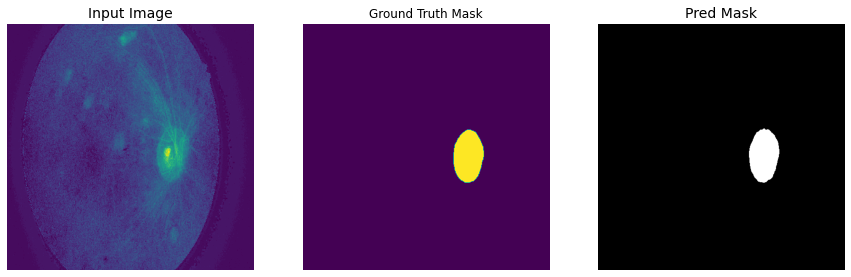

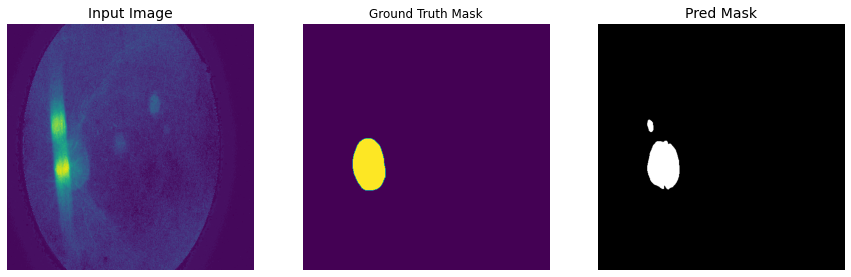

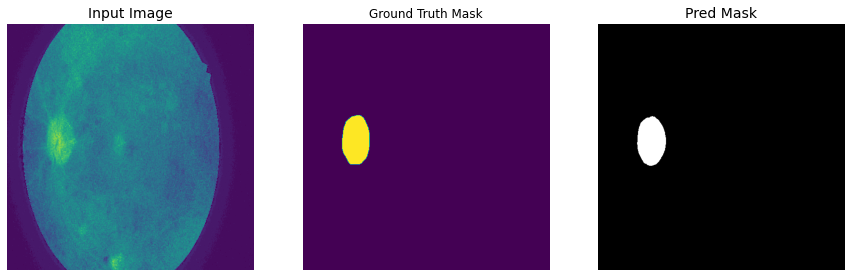

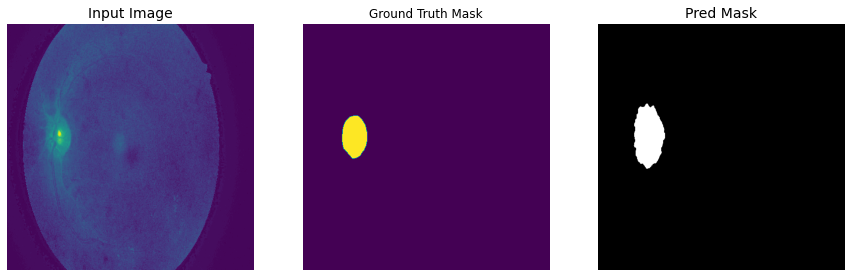

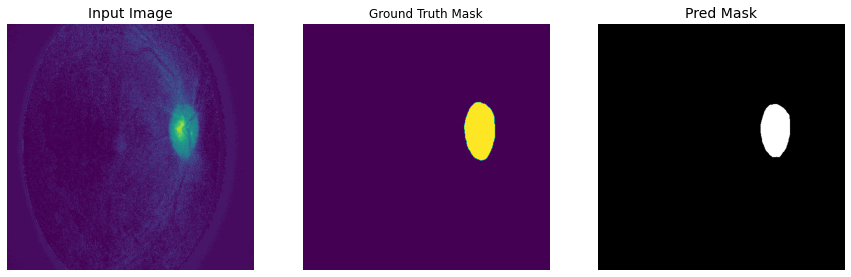

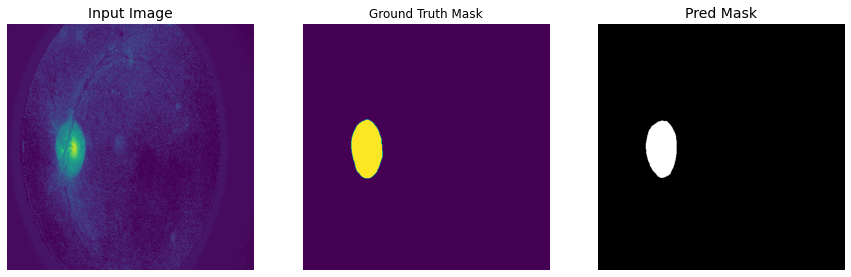

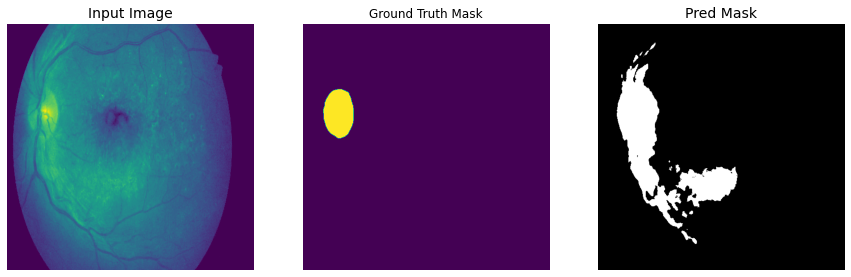

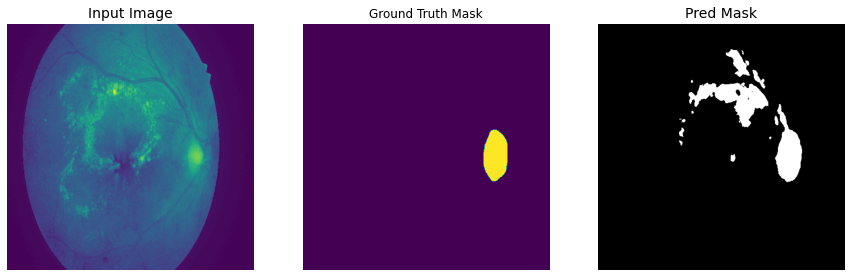

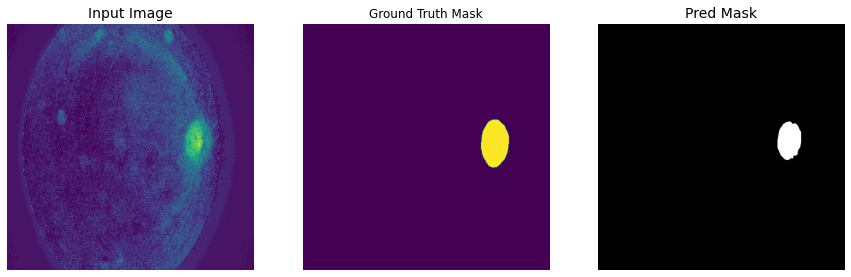

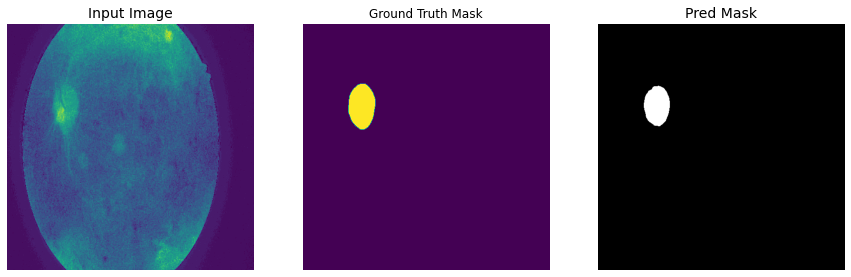

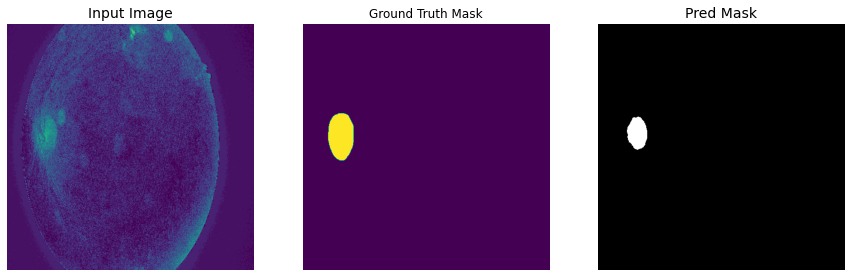

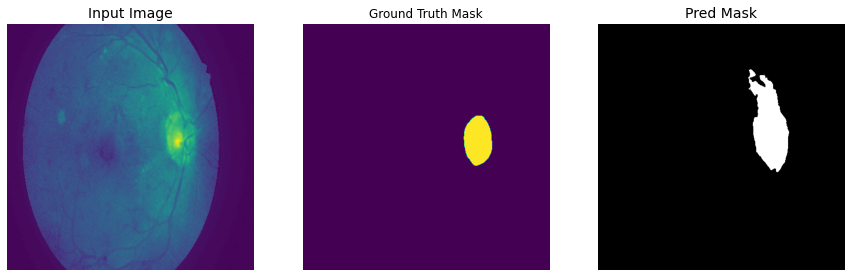

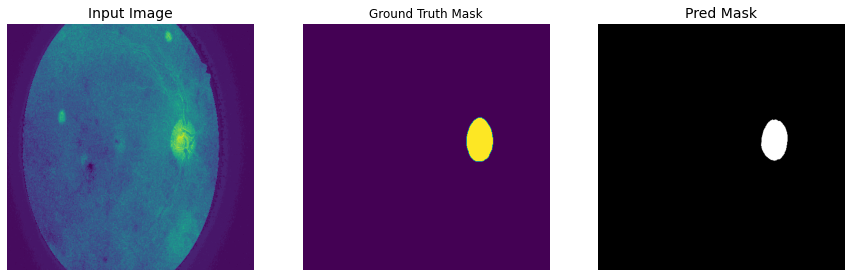

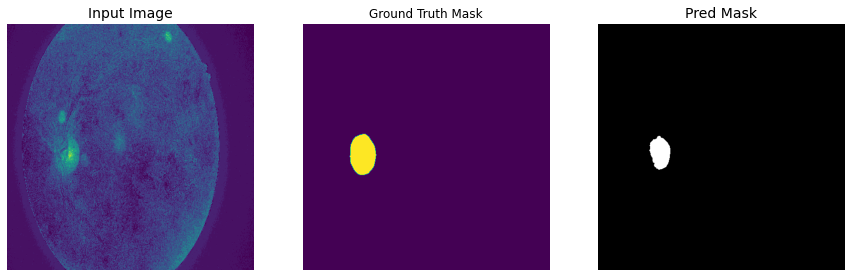

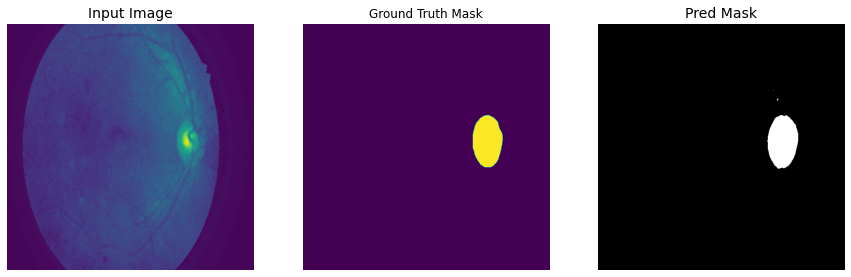

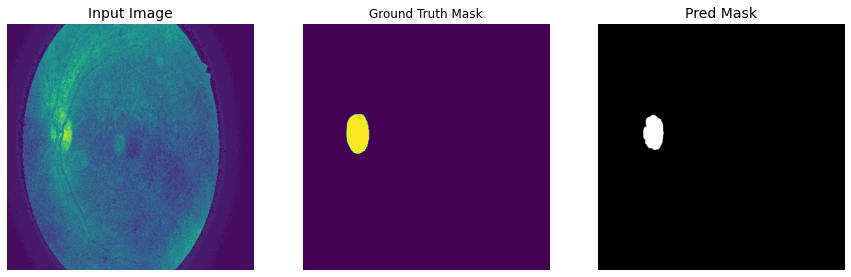

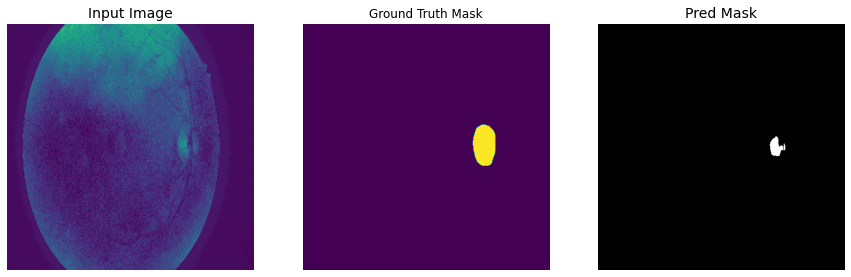

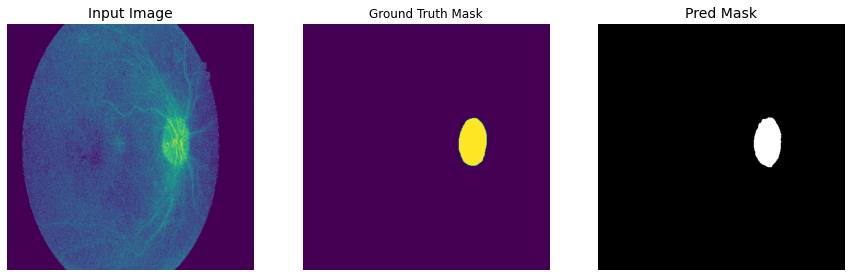

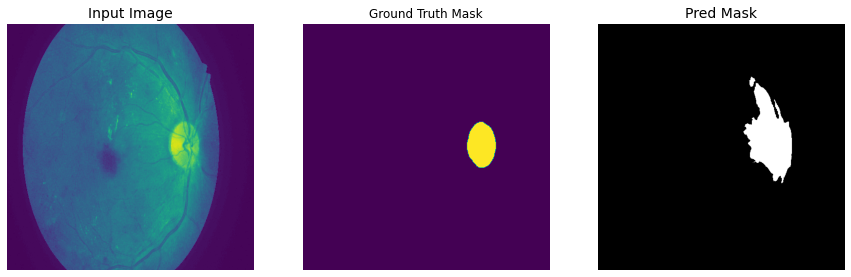

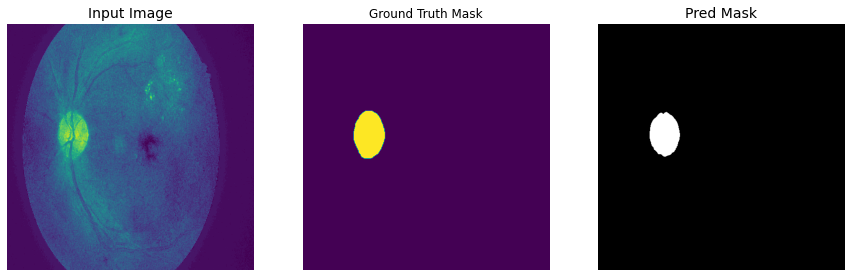

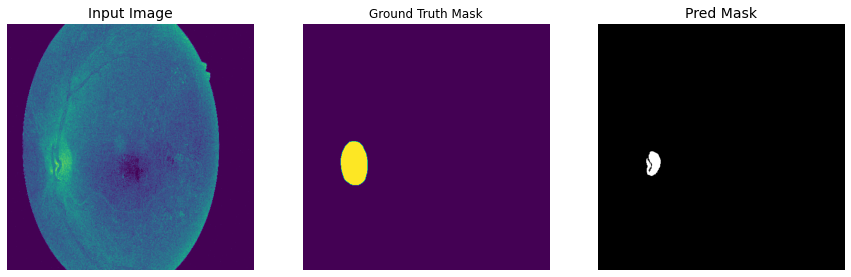

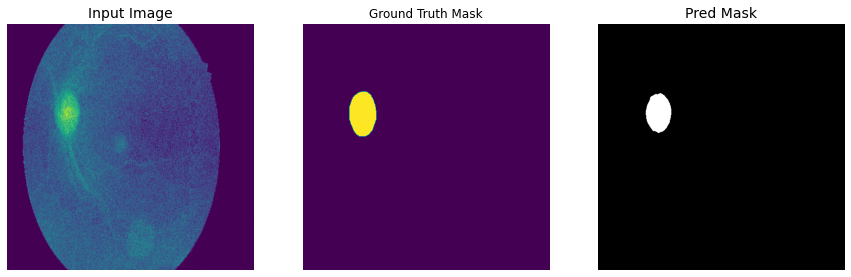

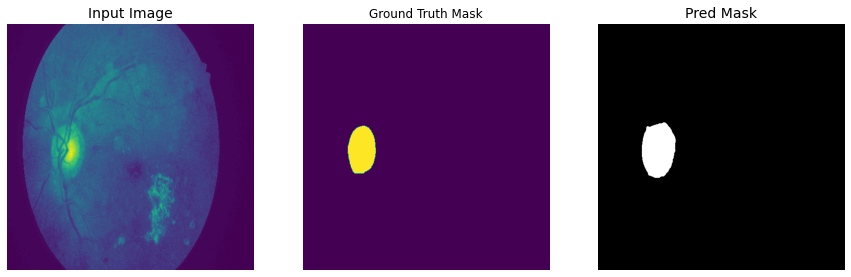

In [ ]:
for i in range(0,len(img_array_v)):
    plt.figure(figsize=(15,15))
    plt.axis('Off')
    test_image = img_array_v[i, :, :, 0]
    plt.subplot(1,3,1)
    plt.imshow(test_image)
    plt.title('Input Image', fontsize=14)
    plt.axis('off')

    test_mask=mask_array_v[i,:,:]
    plt.subplot(1,3,2)
    plt.imshow(test_mask)
    plt.title('Ground Truth Mask')
    plt.axis('off')

    test_mask = preds_test_thresh[i, :, :, 0]
    plt.subplot(1,3,3)
    plt.imshow(test_mask, cmap='gray')
    plt.title('Pred Mask', fontsize=14)
    plt.axis('off')

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize metrics
iou_scores = []
dice_scores = []
pixel_accuracies = []
precisions = []
recalls = []
f1_scores = []

for i in range(0, len(img_array_v)):
    # Flatten the images and masks for easier metric calculation
    true_mask = mask_array_v[i].flatten()
    pred_mask = preds_test_thresh[i, :, :, 0].flatten()

    # Intersection over Union (IoU)
    intersection = np.sum((true_mask == 1) & (pred_mask == 1))
    union = np.sum((true_mask == 1) | (pred_mask == 1))
    iou = intersection / union if union != 0 else 0
    iou_scores.append(iou)

    # Dice Coefficient (DSC)
    dice = 2 * intersection / (np.sum(true_mask == 1) + np.sum(pred_mask == 1))
    dice_scores.append(dice)

    # Pixel Accuracy
    pixel_accuracy = np.sum(true_mask == pred_mask) / len(true_mask)
    pixel_accuracies.append(pixel_accuracy)

    # Precision, Recall, F1-Score
    precision = precision_score(true_mask, pred_mask)
    recall = recall_score(true_mask, pred_mask)
    f1 = f1_score(true_mask, pred_mask)

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Average performance metrics
avg_iou = np.mean(iou_scores)
avg_dice = np.mean(dice_scores)
avg_pixel_accuracy = np.mean(pixel_accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

# Print the results
print(f"Average IoU: {avg_iou:.4f}")
print(f"Average Dice Score: {avg_dice:.4f}")
print(f"Average Pixel Accuracy: {avg_pixel_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1:.4f}")


Average IoU: 0.8046
Average Dice Score: 0.8791
Average Pixel Accuracy: 0.9966
Average Precision: 0.9594
Average Recall: 0.8444
Average F1-Score: 0.8791


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

augmented_train_images = datagen.flow(img_array_t, mask_array_t, batch_size=1)

def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)

model = Linknet(BACKBONE,
                input_shape=(512,512,3),
                encoder_weights='imagenet',
                activation='sigmoid',
                kernel_regularizer=regularizers.l2(0.01))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['binary_accuracy', tf.keras.metrics.Recall(),
                       tf.keras.metrics.Precision(), tf.keras.metrics.AUC(),
                       sm.metrics.IOUScore(), sm.metrics.FScore()])

mp = ModelCheckpoint('best_seg_model.h5', save_best_only=True, monitor='val_iou_score')
lrp = ReduceLROnPlateau(monitor="iou_score", factor=0.1, patience=2)
es = EarlyStopping(patience=2, monitor='iou_score')

history = model.fit(augmented_train_images,
                    epochs=70,
                    validation_data=(img_array_v, mask_array_v),
                    callbacks=[lr_scheduler, es, mp])

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['binary_accuracy']
val_accuracy = history.history['val_binary_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

test_preds = model.predict(img_array_v)
preds_test_thresh = (test_preds >= 0.5).astype(np.uint8)
test_img = preds_test_thresh[5, :, :, 0]
plt.imshow(test_img, cmap='gray')

model.save('/kaggle/working/linknet.h5')

unetm = load_model('/kaggle/working/trained_model.h5', custom_objects={'iou_score': iou_score, 'f1_score': f1_score})

test_preds = unetm.predict(img_array_v)
preds_test_thresh = (test_preds >= 0.5).astype(np.uint8)
test_img = preds_test_thresh[5, :, :, 0]
plt.imshow(test_img, cmap='gray')

for i in range(0,len(img_array_v)):
    plt.figure(figsize=(15,15))
    plt.axis('Off')
    test_image = img_array_v[i, :, :, 0]
    plt.subplot(1,3,1)
    plt.imshow(test_image)
    plt.title('Input Image', fontsize=14)
    plt.axis('off')

    test_mask=mask_array_v[i,:,:]
    plt.subplot(1,3,2)
    plt.imshow(test_mask)
    plt.title('Ground Truth Mask')
    plt.axis('off')

    test_mask = preds_test_thresh[i, :, :, 0]
    plt.subplot(1,3,3)
    plt.imshow(test_mask, cmap='gray')
    plt.title('Pred Mask', fontsize=14)
    plt.axis('off')

from sklearn.metrics import precision_score, recall_score, f1_score

iou_scores = []
dice_scores = []
pixel_accuracies = []
precisions = []
recalls = []
f1_scores = []

for i in range(0, len(img_array_v)):
    true_mask = mask_array_v[i].flatten()
    pred_mask = preds_test_thresh[i, :, :, 0].flatten()

    intersection = np.sum((true_mask == 1) & (pred_mask == 1))
    union = np.sum((true_mask == 1) | (pred_mask == 1))
    iou = intersection / union if union != 0 else 0
    iou_scores.append(iou)

    dice = 2 * intersection / (np.sum(true_mask == 1) + np.sum(pred_mask == 1))
    dice_scores.append(dice)

    pixel_accuracy = np.sum(true_mask == pred_mask) / len(true_mask)
    pixel_accuracies.append(pixel_accuracy)

    precision = precision_score(true_mask, pred_mask)
    recall = recall_score(true_mask, pred_mask)
    f1 = f1_score(true_mask, pred_mask)

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

avg_iou = np.mean(iou_scores)
avg_dice = np.mean(dice_scores)
avg_pixel_accuracy = np.mean(pixel_accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print(f"Average IoU: {avg_iou:.4f}")
print(f"Average Dice Score: {avg_dice:.4f}")
print(f"Average Pixel Accuracy: {avg_pixel_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1:.4f}")
